In [1]:
from selenium import webdriver
import time
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [4]:
PATH = "C:\Program Files (x86)\chromedriver.exe" #Change this to where you've stored it.
driver = webdriver.Chrome(PATH) #Creates an instance of webdriver.

driver.get("https://www.thenibblebyte.com/blog/categories/compandcode") #Using TheNibbleByte's website where the views are.


blogPosts = driver.find_elements_by_class_name("MlM6L") #Finds elements based on the span tag values.
views = [] 

for post in blogPosts: #Loops through all the span tags with the number of views.
    temp = int(post.text) #Stores the WebElement value in a 'temp' variable and converts to Integer.
    views.append(temp) #Adds it to the list for later.
    
driver.close() #Closes the page.

In [5]:
#Data Science Part of Solution:

#Cleansing the data.
for numberOfViews in views: #Looping through each element.
    if numberOfViews < 10: #Heuristic comparison. Becayse I get low comments, I assume 10 or less are comments, NOT views.
        print("Removing ", numberOfViews ,views.remove(numberOfViews)) #Alert the user that low values are getting removed.
#print(cleanViews)

Removing  2 None
Removing  2 None
Removing  4 None


In [6]:
cleanViews = np.flipud(views) #Reverses the order so it goes from August 2020 onwards essentially.
cleanViews = cleanViews[cleanViews != 0] #Only takes in 0 values (removes NumPy default 0)
#print(cleanViews)

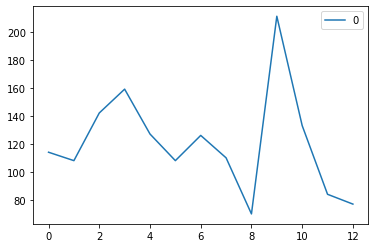

In [13]:
#Generating Labels:
labels = []
for i in range(0, len(cleanViews)): #Generates as many labels as per records.
    labels.append(i)

theLabels = np.array(labels)
graphData = pd.DataFrame(data=cleanViews,index=labels) #Converts the 2 arrays to a DataFrame.

graph = sns.lineplot(data=graphData)